# Analiza i wizualizacja danych - zestaw danych 'Penguins'

## 1. Wstęp

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC


### Informacje

Opis zmiennych:
- **species**: gatunek pingwina (Chinstrap, Adélie lub Gentoo)
- **culmen_length_mm**: długość dzioba (mm)
- **culmen_depth_mm**: głębokość dzioba (mm)
- **flipper_length_mm**: długość skrzydła (mm)
- **body_mass_g**: masa ciała (g)
- **island**: wyspa na Archipelagu Palmera (Dream, Torgersen, or Biscoe), na której egzystuje pingwin
- **sex**: płeć pingwina

Użyte pakiety:
- matplotlib
- seaborn
- sklearn
- pandas
- numpy


Źródło danych: https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

In [207]:
rawdata = pd.read_csv('penguins.csv')
rawdata

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 2. Poszukiwanie i wizualizacja danych "pustych"

In [208]:
rawdata.isnull().any().any()

True

In [209]:
rawdata[rawdata.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


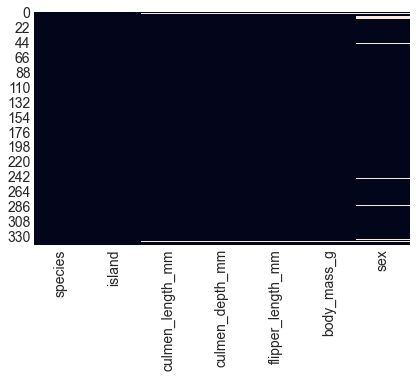

In [210]:
sns.heatmap(rawdata.isnull(),cbar=False)
plt.show()

In [211]:
data = rawdata.dropna()
data.isnull().any().any()

False

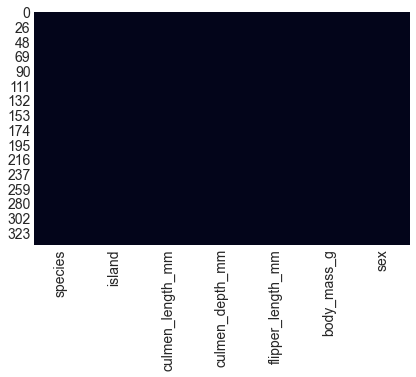

In [212]:
sns.heatmap(data.isnull(),cbar=False)
plt.show()

## 3. EDA

In [213]:
print(data.species.value_counts(),
      data.island.value_counts(),
      data.sex.value_counts(),
      sep='\n\n')

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

MALE      168
FEMALE    165
Name: sex, dtype: int64


In [231]:
data.describe().round(2)[1:]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
mean,43.99,17.16,200.97,4207.06
std,5.47,1.97,14.02,805.22
min,32.10,13.10,172.00,2700.00
25%,39.50,15.60,190.00,3550.00
50%,44.50,17.30,197.00,4050.00
75%,48.60,18.70,213.00,4775.00
max,59.60,21.50,231.00,6300.00


In [215]:
data.var()

culmen_length_mm         29.906333
culmen_depth_mm           3.877888
flipper_length_mm       196.441677
body_mass_g          648372.487699
dtype: float64

In [216]:
data.skew()

culmen_length_mm     0.045340
culmen_depth_mm     -0.149720
flipper_length_mm    0.360148
body_mass_g          0.472246
dtype: float64

In [230]:
print('Średnia:',
      data.groupby(['species']).mean().round(2),
      'Mediana:',
      data.groupby(['species']).median().round(2),
      'Odchylenie standardowe:',
      data.groupby(['species']).std().round(2),
      sep='\n\n')

Średnia:

           culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                     
Adelie                38.82            18.35             190.10      3706.16
Chinstrap             48.83            18.42             195.82      3733.09
Gentoo                47.57            15.00             217.24      5092.44

Mediana:

           culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                     
Adelie                38.85            18.40              190.0       3700.0
Chinstrap             49.55            18.45              196.0       3700.0
Gentoo                47.40            15.00              216.0       5050.0

Odchylenie standardowe:

           culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                     
Adelie                 2.66  

In [228]:
data.groupby(['island', 'species'], sort=True).mean().round(2)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
island    species                                                           
Biscoe    Adelie                38.98            18.37             188.80   
          Gentoo                47.57            15.00             217.24   
Dream     Adelie                38.52            18.24             189.93   
          Chinstrap             48.83            18.42             195.82   
Torgersen Adelie                39.04            18.45             191.53   

                     body_mass_g  
island    species                 
Biscoe    Adelie         3709.66  
          Gentoo         5092.44  
Dream     Adelie         3701.36  
          Chinstrap      3733.09  
Torgersen Adelie         3708.51

In [257]:
(data.groupby(['island', 'species', 'sex'], sort=True)
    .count()
    .iloc[:,0]
    .rename('count'))

island     species    sex   
Biscoe     Adelie     FEMALE    22
                      MALE      22
           Gentoo     FEMALE    58
                      MALE      61
Dream      Adelie     FEMALE    27
                      MALE      28
           Chinstrap  FEMALE    34
                      MALE      34
Torgersen  Adelie     FEMALE    24
                      MALE      23
Name: count, dtype: int64

In [267]:
(data.groupby(['island', 'species'])
    .agg(['median', 'mean', 'min', 'max', 'std'])
    .round(2)
    [['culmen_length_mm', 'culmen_depth_mm']])

culmen_length_mm                          culmen_depth_mm  \
                              median   mean   min   max   std          median   
island    species                                                               
Biscoe    Adelie               38.70  38.98  34.5  45.6  2.48           18.45   
          Gentoo               47.40  47.57  40.9  59.6  3.11           15.00   
Dream     Adelie               38.80  38.52  32.1  44.1  2.48           18.40   
          Chinstrap            49.55  48.83  40.9  58.0  3.34           18.45   
Torgersen Adelie               39.00  39.04  33.5  46.0  3.03           18.40   

                                              
                      mean   min   max   std  
island    species                             
Biscoe    Adelie     18.37  16.0  21.1  1.19  
          Gentoo     15.00  13.1  17.3  0.99  
Dream     Adelie     18.24  15.5  21.2  1.14  
          Chinstrap  18.42  16.4  20.8  1.14  
Torgersen Adelie     18.45  15.9  21.5  1.35

In [266]:
(data.groupby(['island', 'species'])
    .agg(['median', 'mean', 'min', 'max', 'std'])
    .round(2)
    [['flipper_length_mm', 'body_mass_g']])

flipper_length_mm                             body_mass_g  \
                               median    mean    min    max   std      median   
island    species                                                               
Biscoe    Adelie                189.5  188.80  172.0  203.0  6.73      3750.0   
          Gentoo                216.0  217.24  203.0  231.0  6.59      5050.0   
Dream     Adelie                190.0  189.93  178.0  208.0  6.48      3600.0   
          Chinstrap             196.0  195.82  178.0  212.0  7.13      3700.0   
Torgersen Adelie                191.0  191.53  176.0  210.0  6.22      3700.0   

                                                      
                        mean     min     max     std  
island    species                                     
Biscoe    Adelie     3709.66  2850.0  4775.0  487.73  
          Gentoo     5092.44  3950.0  6300.0  501.48  
Dream     Adelie     3701.36  2900.0  4650.0  448.77  
          Chinstrap  3733.09  2700.0  4800.0  384.34  
Torgersen Adelie     3708.51  2900.0  4700.0  451.85

In [271]:
data.pivot_table(values='flipper_length_mm',
                 index='sex',
                 columns=['island', 'species'],
                 aggfunc=np.mean).round(2)

island   Biscoe           Dream           Torgersen
species  Adelie  Gentoo  Adelie Chinstrap    Adelie
sex                                                
FEMALE   187.18  212.71  187.85    191.74    188.29
MALE     190.41  221.54  191.93    199.91    194.91

In [277]:
(pd.pivot_table(data,
               index=['island', 'species', 'sex'])
               .round(2)
               [data.columns[2:6]])

culmen_length_mm  culmen_depth_mm  \
island    species   sex                                         
Biscoe    Adelie    FEMALE             37.36            17.70   
                    MALE               40.59            19.04   
          Gentoo    FEMALE             45.56            14.24   
                    MALE               49.47            15.72   
Dream     Adelie    FEMALE             36.91            17.62   
                    MALE               40.07            18.84   
          Chinstrap FEMALE             46.57            17.59   
                    MALE               51.09            19.25   
Torgersen Adelie    FEMALE             37.55            17.55   
                    MALE               40.59            19.39   

                            flipper_length_mm  body_mass_g  
island    species   sex                                     
Biscoe    Adelie    FEMALE             187.18      3369.32  
                    MALE               190.41      4050.00  
          Gentoo    FEMALE             212.71      4679.74  
                    MALE               221.54      5484.84  
Dream     Adelie    FEMALE             187.85      3344.44  
                    MALE               191.93      4045.54  
          Chinstrap FEMALE             191.74      3527.21  
                    MALE               199.91      3938.97  
Torgersen Adelie    FEMALE             188.29      3395.83  
                    MALE               194.91      4034.78

## 4. Przygotowywanie danych do modelu

In [29]:
model_data = data.copy()
model_data.drop('island', axis=1)

encoder = LabelEncoder()
maps = list()

for col_name in ['species', 'island', 'sex']:
    model_data[col_name] = encoder.fit_transform(model_data[col_name])
    value_map = {index: label for index, label in enumerate(encoder.classes_)}
    maps.append(value_map)

In [30]:
model_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [31]:
X = model_data.drop('species', axis=1)
Y = model_data.species

In [32]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [33]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.167273,0.738095,0.355932,0.208333,0.0
4,1.0,0.261818,0.892857,0.305085,0.263889,1.0
...,...,...,...,...,...,...
328,0.0,0.549091,0.071429,0.711864,0.618056,0.0
329,0.0,0.534545,0.142857,0.728814,0.597222,0.0
330,0.0,0.665455,0.309524,0.847458,0.847222,1.0
331,0.0,0.476364,0.202381,0.677966,0.694444,0.0


In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(266, 6) (67, 6) (266,) (67,)


## 5. Podstawowe wykresy

### Wykres słupkowy

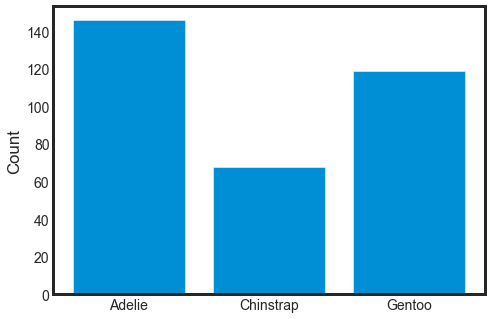

In [344]:
barplot = plt.figure()
ax = barplot.add_axes([0,0,1,1])
ax.bar(list(data.species.unique()),
       list(data.groupby('species').count()['island']))
plt.ylabel('Count')
plt.show()

### Wykres kołowy

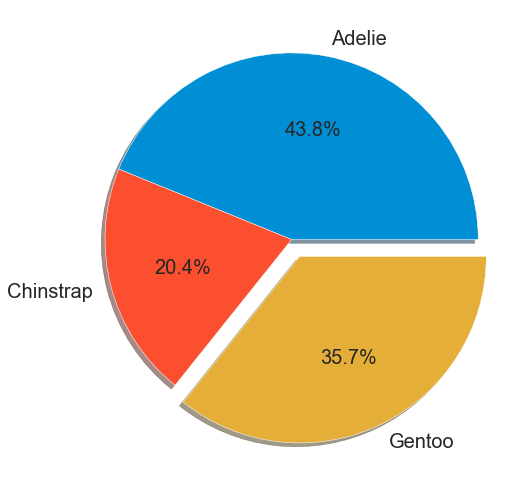

In [373]:
plt.figure(figsize=(13,8))
piechart = plt.pie(list(data.groupby('species').count()['island']),
                   labels=list(data.species.unique()),
                   shadow=True,
                   explode=(0,0,.1),
                   autopct='%1.1f%%',
                   textprops={'fontsize': 20})
#plt.title('Wykres kołowy', fontsize=20)

plt.show()

## 6. Korelacja

### Wykres korelacji

In [204]:
def correlation_plot(corr, half=False):
    "Funkcja wizualizująca korelację Persona między atrybutami"
    
    plt.style.use('fivethirtyeight')
    sns.set_style("white")
    color_map = sns.diverging_palette(260, 10, as_cmap=True)
    m = half
    
    if m:
        m = np.zeros_like(corr, dtype=np.bool)
        m[np.triu_indices_from(m)] = True
    
    plt.figure(figsize=(12,9))
    plt.title('Correlation between attributes', fontsize=18)
    heat_map = sns.heatmap(corr, 
                           annot=True,
                           annot_kws={"fontsize": 18},
                           square='square',
                           mask=m, 
                           cmap=color_map,
                           fmt='.2g',
                           linewidths=5,
                           vmax=1.1,
                           vmin=-1.1)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), 
                             rotation=0, 
                             fontsize=20)
    heat_map.set_xticklabels(heat_map.get_xticklabels(), 
                             rotation=90,
                             fontsize=20)
plt.show()

In [35]:
corr = model_data.corr(method='pearson')
corr

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435
culmen_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078
culmen_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000


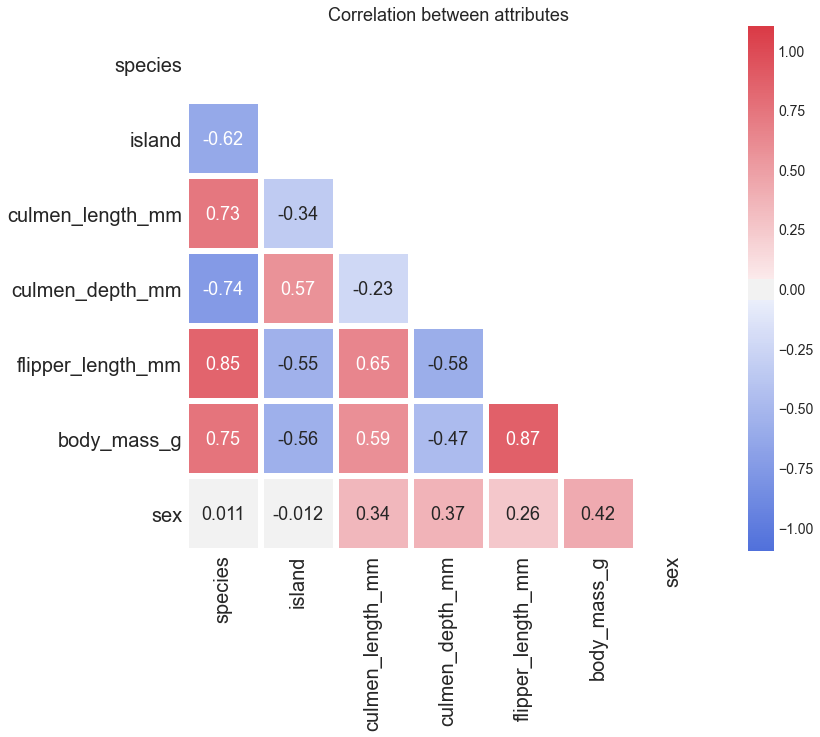

In [205]:
correlation_plot(corr, half=True)

### Wykresy rozproszenia

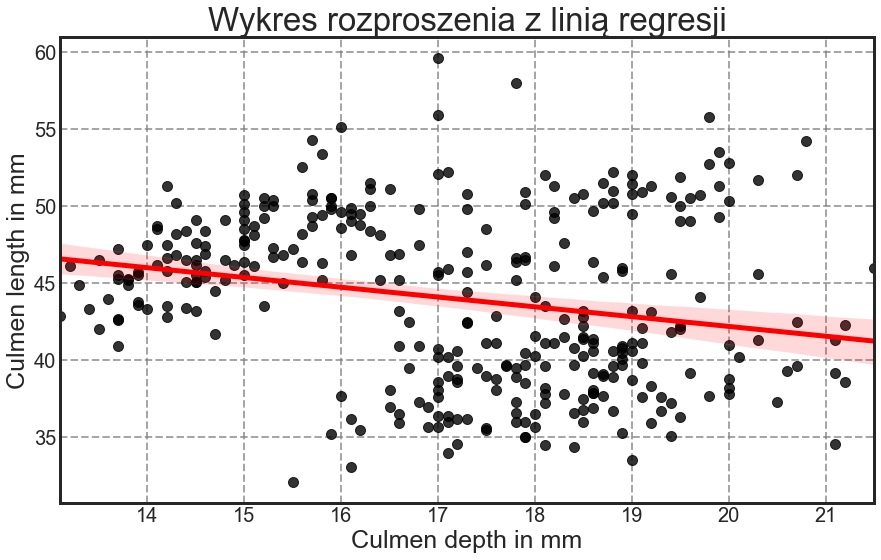

In [406]:
plt.figure(figsize=(13,8))
plot = sns.regplot(x='culmen_depth_mm',
                   y='culmen_length_mm',
                   data=data,
                   scatter_kws={"s": 100,
                                "color": 'black'},
                   line_kws={"linewidth": 5, 
                             "color": 'red'})
plt.title('Wykres rozproszenia z linią regresji', fontsize=33)
plt.xlabel('Culmen depth in mm', fontsize=25)
plt.ylabel('Culmen length in mm', fontsize=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(linestyle='--', 
         linewidth=2, 
         alpha=.7, 
         color='gray')

plt.show()

In [415]:
def draw_scatter(data, x, y, xlabel='x', ylabel='y'):
    "Funkcja rysująca wykres rozproszenia"
    
    plt.figure(figsize=(11,11))
    sns.scatterplot(data=data, 
                    s=150, 
                    x=x, 
                    y=y, 
                    hue='species', 
                    legend='full')
    plt.title('Scatter plot', fontsize=22)
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best')
    plt.grid(linestyle='--', 
             linewidth=1, 
             alpha=.5, 
             color='gray')
    
    plt.show()

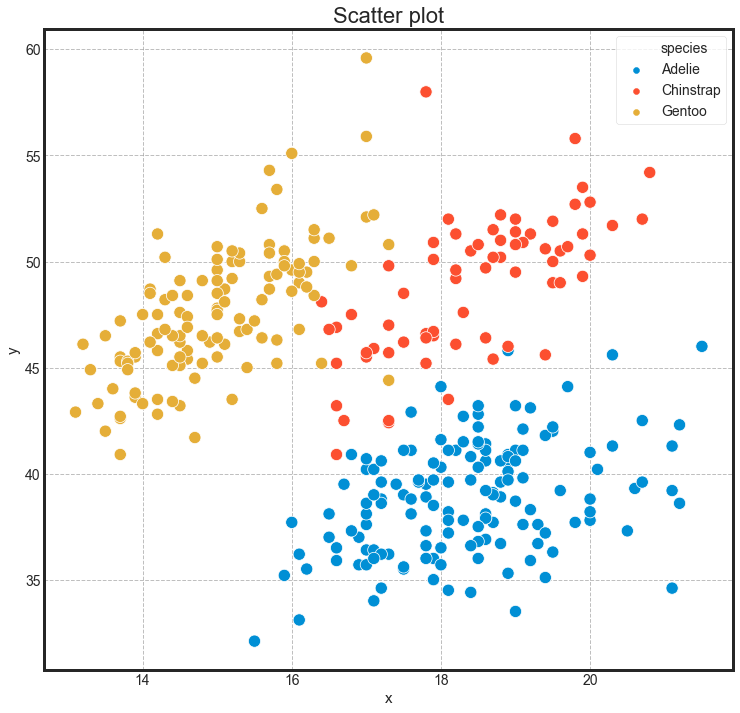

In [416]:
draw_scatter(data, 'culmen_depth_mm', 'culmen_length_mm')

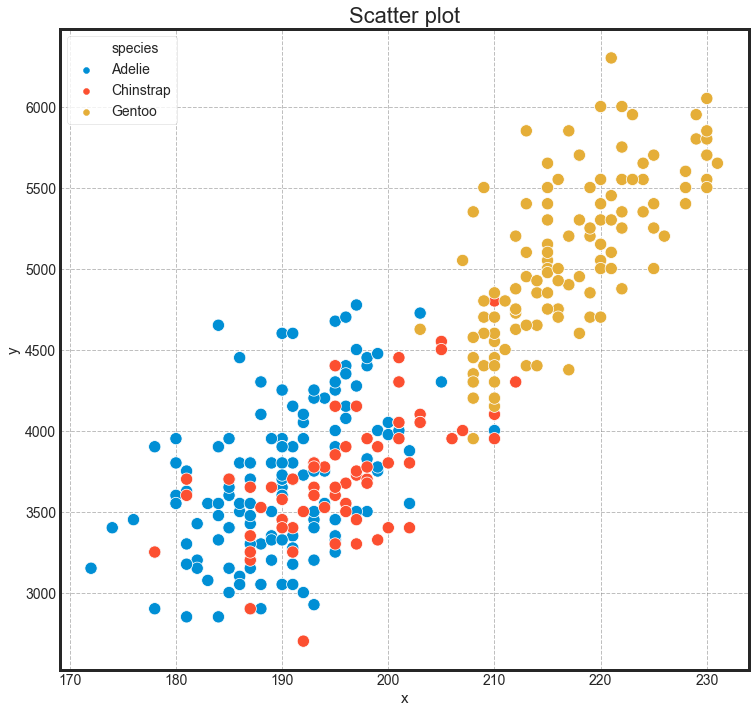

In [417]:
draw_scatter(data, 'flipper_length_mm', 'body_mass_g')

<Figure size 936x576 with 0 Axes>

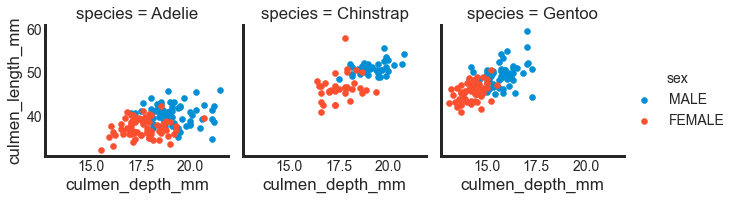

In [318]:
plt.figure(figsize=(13,8))
scatterplot = sns.FacetGrid(data,
                            col='species',
                            hue='sex')
scatterplot = scatterplot.map(plt.scatter, 
                              'culmen_depth_mm', 
                              'culmen_length_mm').add_legend()
plt.show()

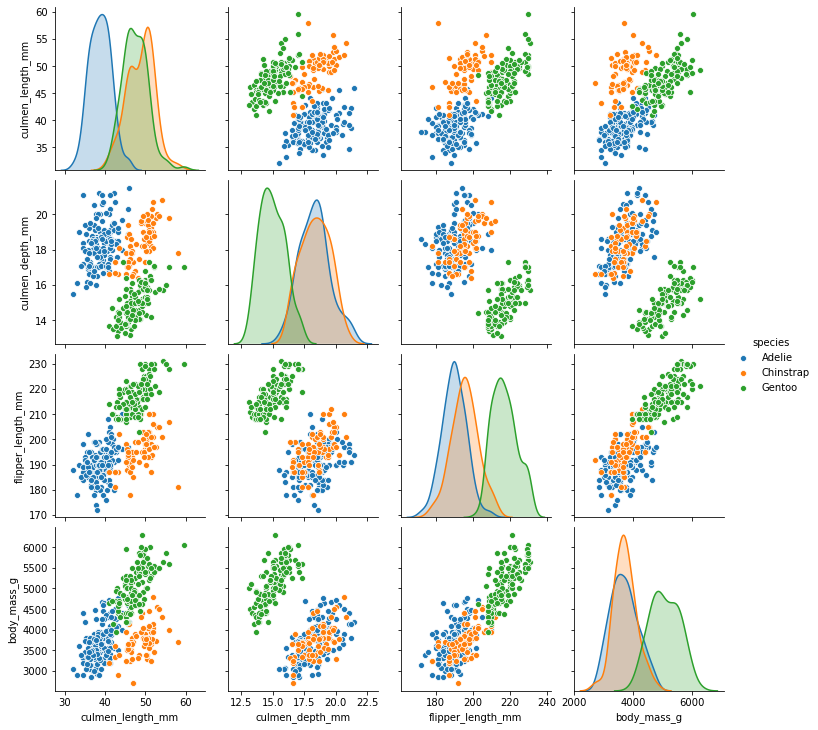

In [40]:
sns.pairplot(data, hue='species')
plt.show()

## 7. Dystrybucja

### Histogram

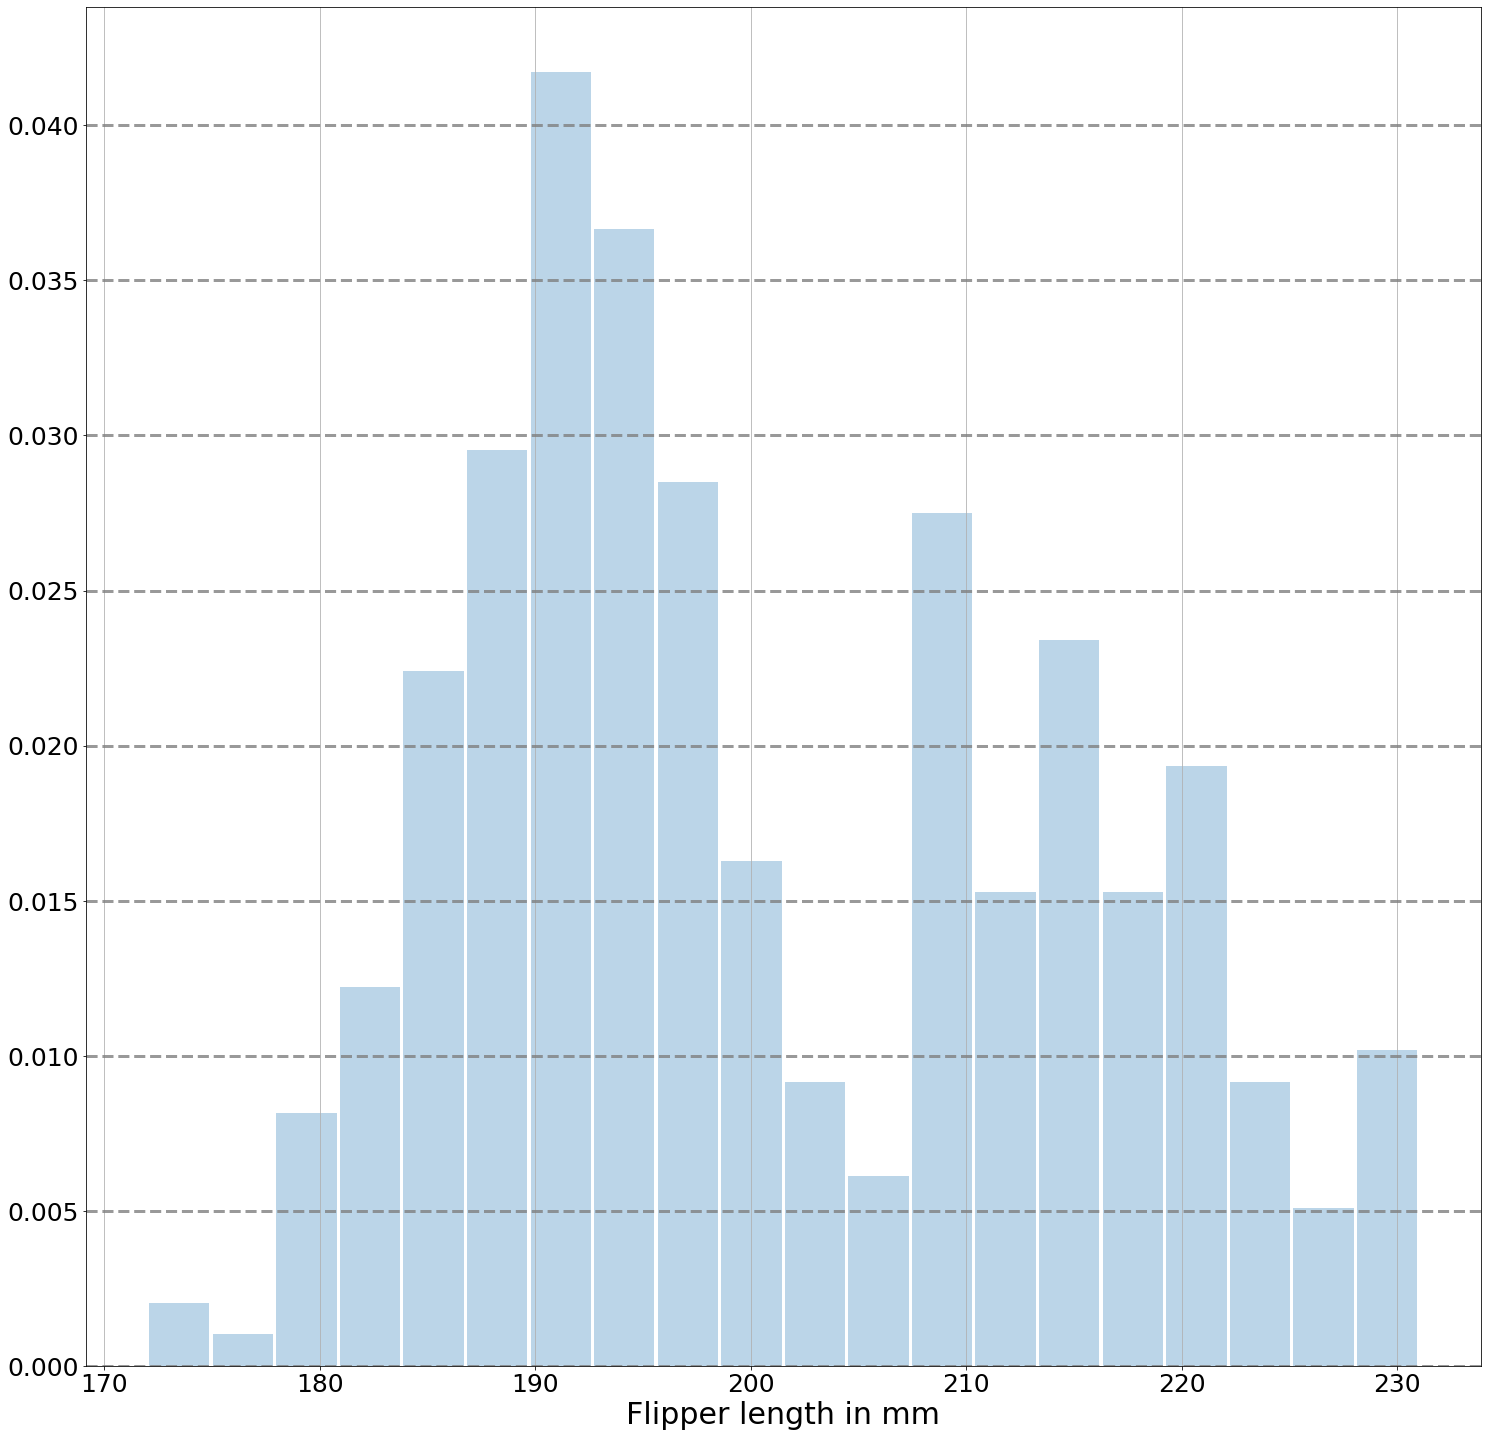

In [41]:
data['flipper_length_mm'].hist(figsize=(25,25),
                               bins=20,
                               alpha=0.3,
                               density=True,
                               rwidth=0.95)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Flipper length in mm', fontsize=30)
plt.grid(axis='y', 
         linestyle='--', 
         linewidth=3, 
         alpha=.8, 
         color='gray', 
         antialiased=True)
plt.show()

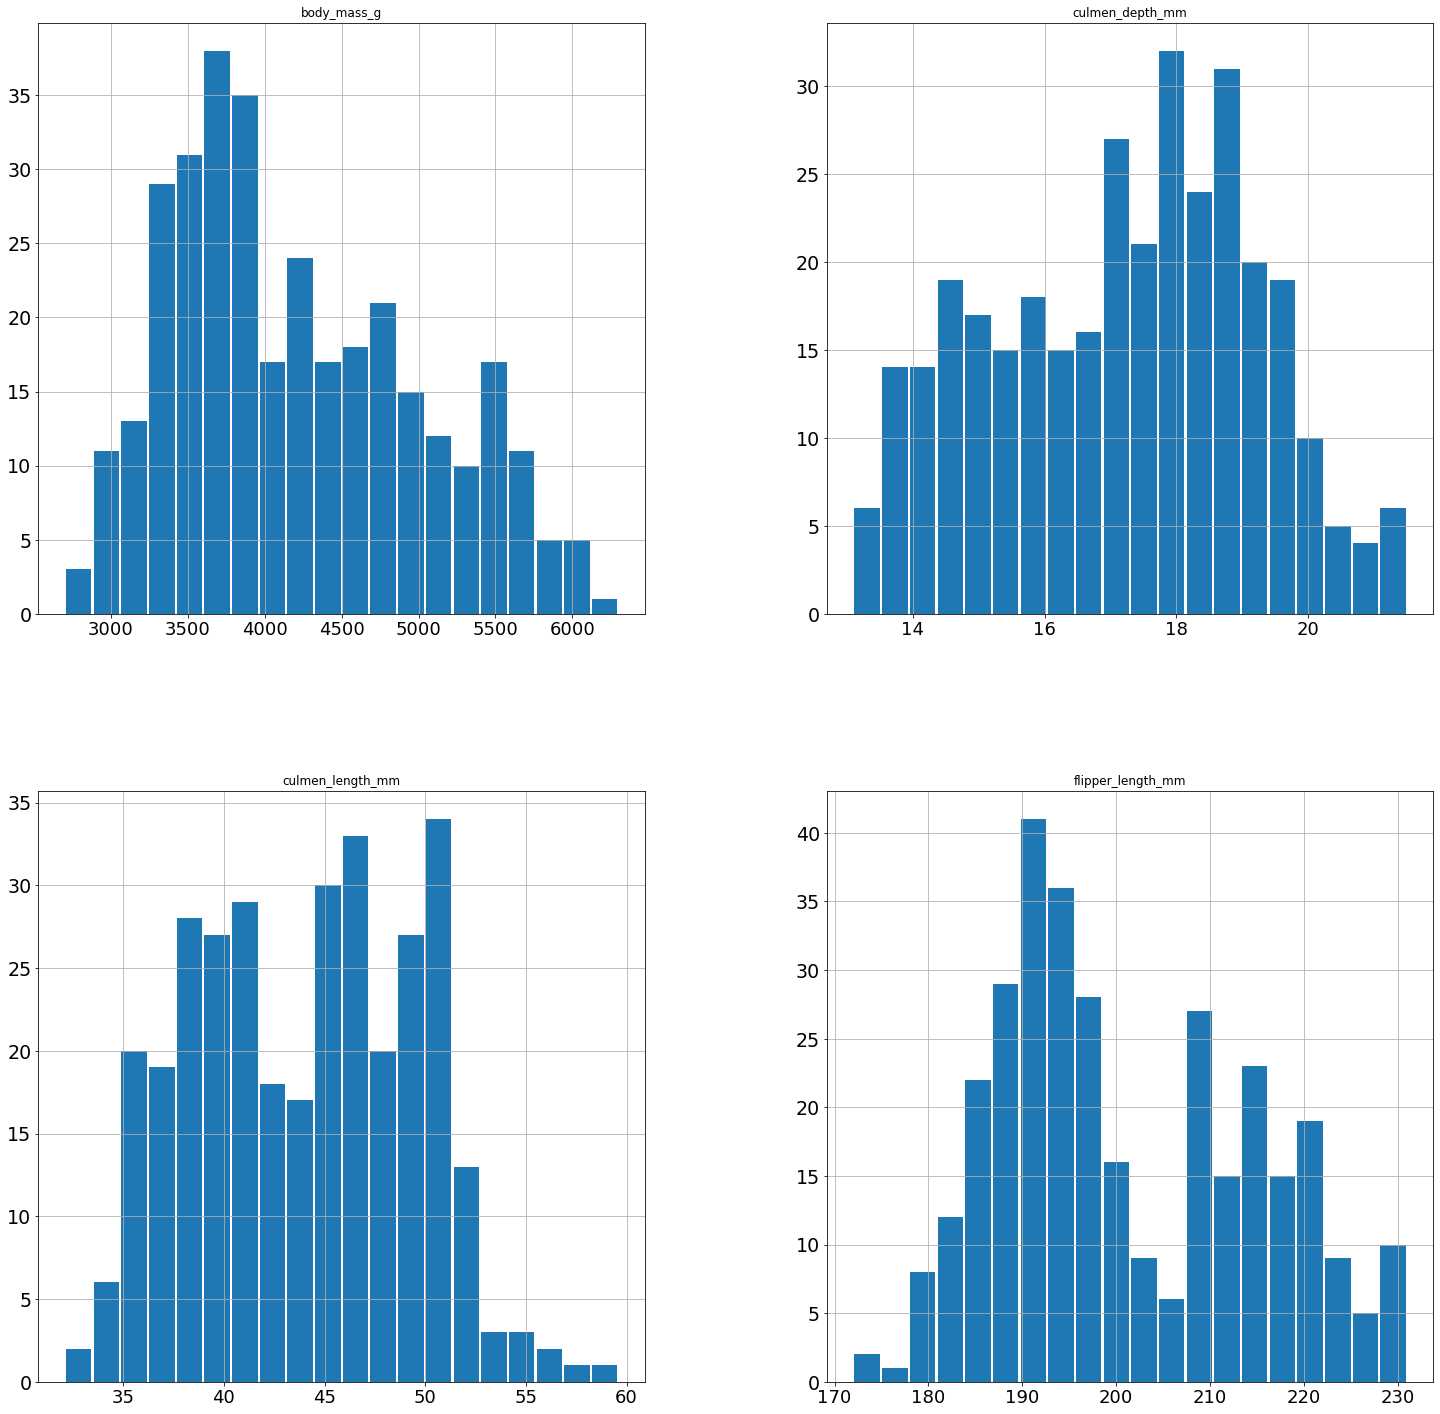

In [42]:
data.hist(figsize=(25,25), 
          xlabelsize = 18, 
          ylabelsize = 19, 
          bins=20,
          rwidth=0.92)
plt.show()

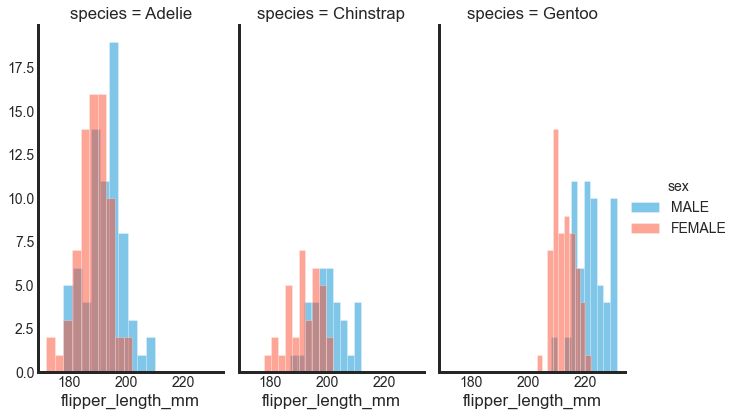

In [331]:
histogram = sns.FacetGrid(data, 
                        hue='sex', 
                        col='species', 
                        height=6,
                        aspect=.5)
histogram = histogram.map(plt.hist, 
                          'flipper_length_mm', 
                          alpha=0.5,
                          bins=10).add_legend()
plt.show()

### Wykres gęstości

In [90]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

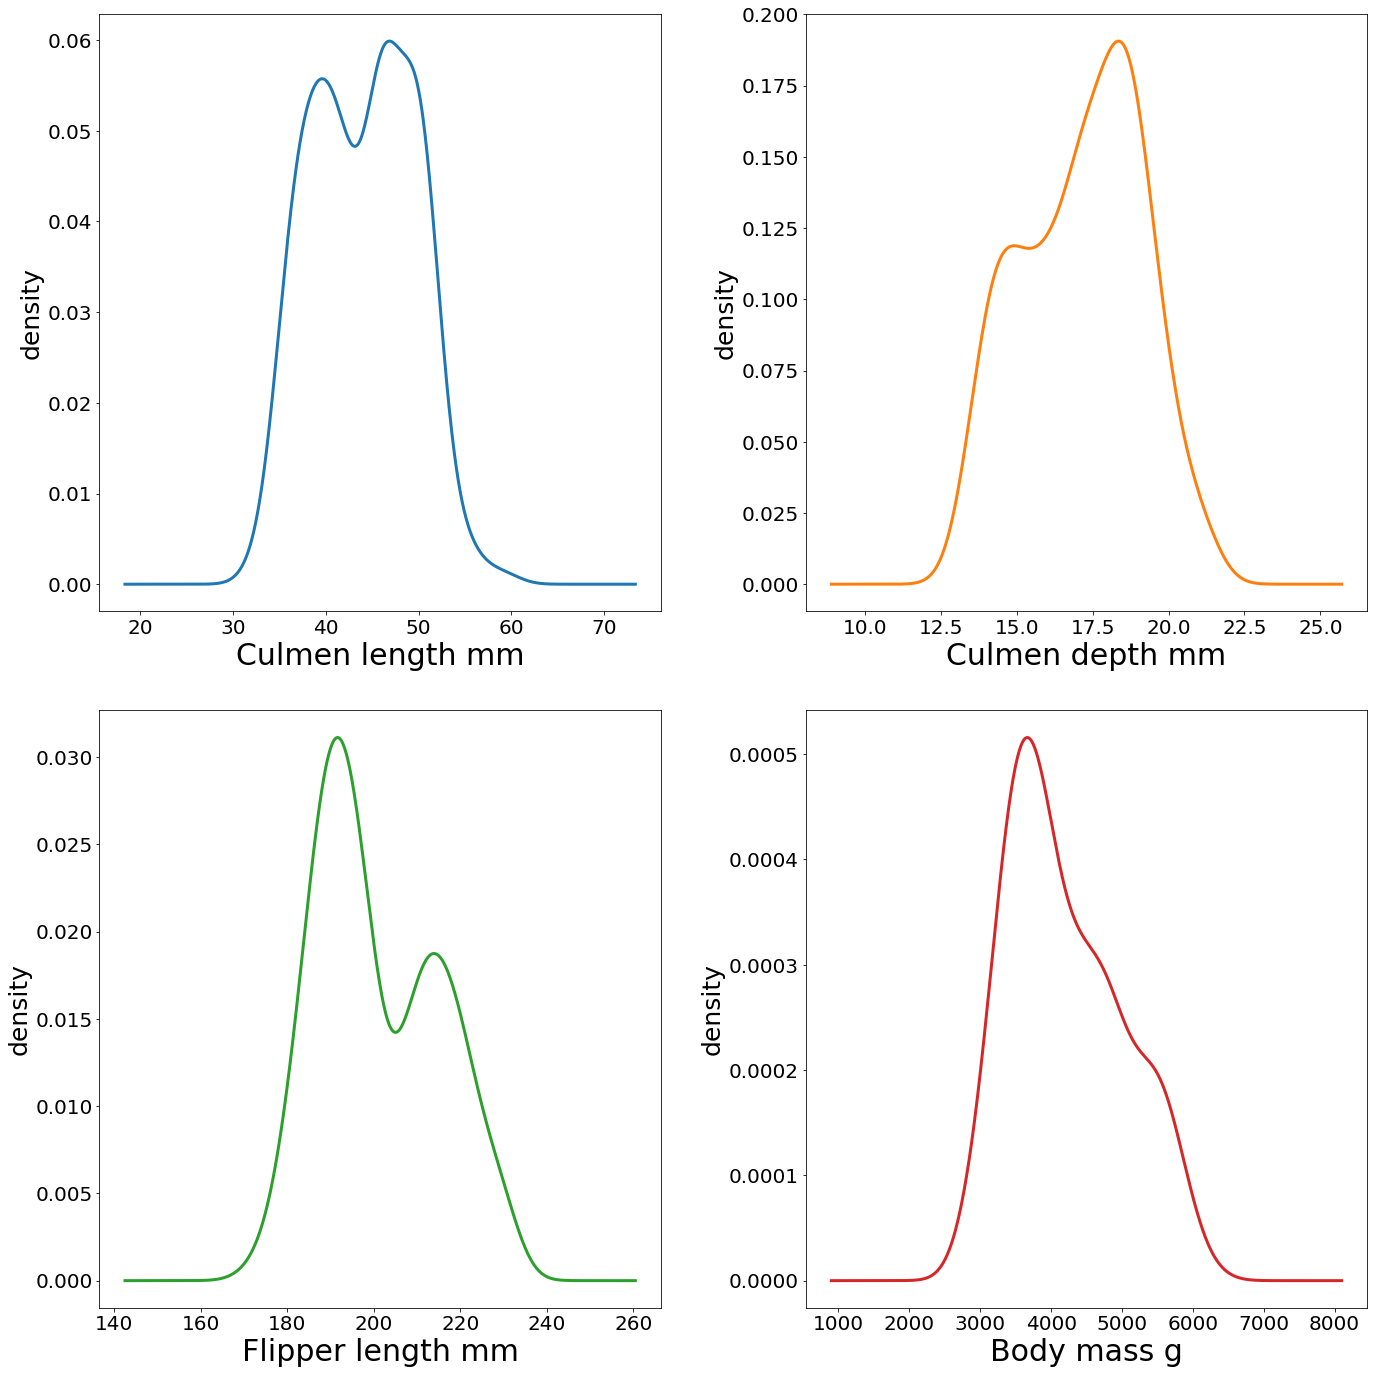

In [124]:
from itertools import chain

density_plot = data.plot(kind = 'density', 
                         figsize=(20,20), 
                         subplots=True,
                         layout=(2,2),
                         sharex=False,
                         linewidth=3,
                         fontsize=20)

density_plot[0][0].set_xlabel(data.columns[2].replace('_', ' ').capitalize(), fontsize = 30)
density_plot[0][1].set_xlabel(data.columns[3].replace('_', ' ').capitalize(), fontsize = 30)
density_plot[1][0].set_xlabel(data.columns[4].replace('_', ' ').capitalize(), fontsize = 30)
density_plot[1][1].set_xlabel(data.columns[5].replace('_', ' ').capitalize(), fontsize = 30)
for x in range(2): 
    for y in range(2):
        density_plot[x][y].set_ylabel('density', fontsize=25)
        density_plot[x][y].get_legend().remove()
    
plt.tight_layout(pad=4.0)
plt.show()

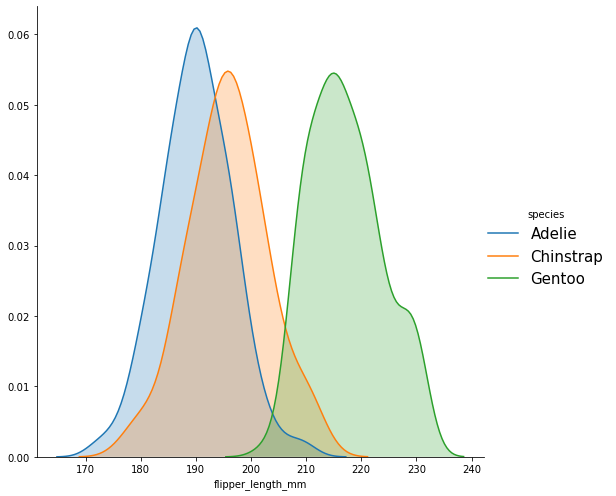

In [125]:
sns.FacetGrid(data, hue="species", height=7,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend(fontsize=15)
plt.show()

### Wykres pudełkowy

In [45]:
def draw_boxplot(data, x, y, figsize=(13,8), title='Boxplot'):
    f, ax = plt.subplots(figsize=figsize)
    sns.boxplot(data=data, 
            x=x, 
            y=y,
            linewidth=3)
    plt.title(title, fontsize=30)
    plt.xlabel(x, fontsize = 24)
    plt.ylabel(y, fontsize = 24)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

In [46]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

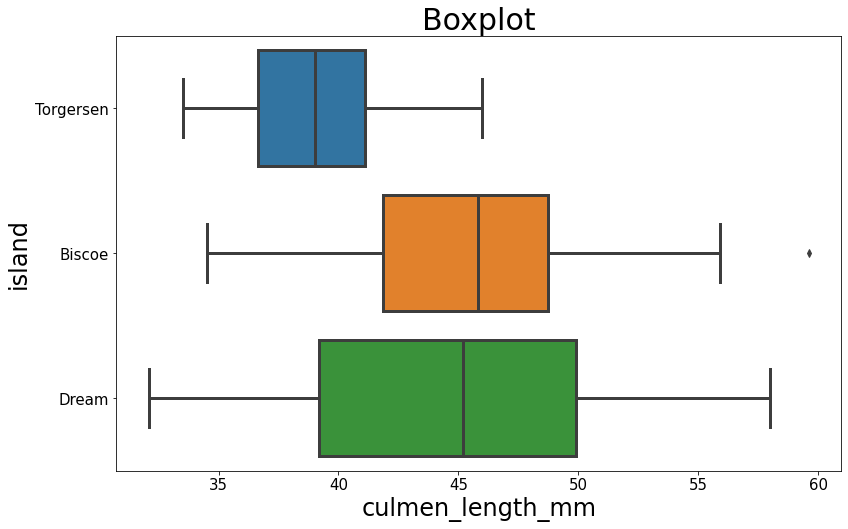

In [47]:
draw_boxplot(data, 'culmen_length_mm', 'island')

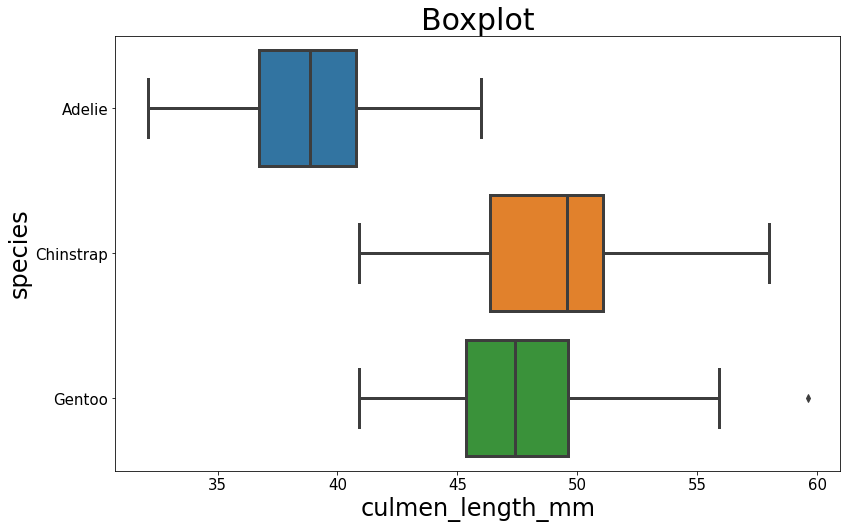

In [48]:
draw_boxplot(data, 'culmen_length_mm', 'species')

### Wykres skrzypcowy

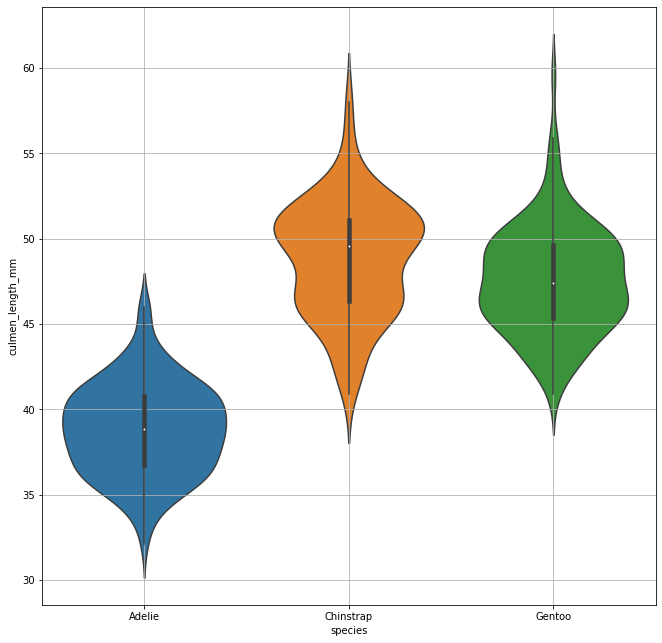

In [49]:
plt.figure(figsize=(11,11))
sns.violinplot(data=data,
               x='species',
               y='culmen_length_mm',
               size=10)
plt.grid('x')
plt.show()

## 8. Trenowanie modelu

In [50]:
svm_model = SVC(C=1.0, kernel='rbf')
svm_model.fit(x_train, y_train)

SVC()

In [51]:
svm_score = svm_model.score(x_test, y_test)
svm_pred = svm_model.predict(x_test)
print(f'Skuteczność zastosowanego modelu wynosi {svm_model.score(x_test, y_test)}')

Skuteczność zastosowanego modelu wynosi 1.0


### Tablica pomyłek (confusion matrix)

In [52]:
def conf_matrix(cm, score, color='Blues'):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, 
                annot=True, 
                fmt=".3f", 
                linewidths=.5, 
                square = True,
                cmap = color);
    plt.ylabel('Rzeczywista wartość', fontsize=15);
    plt.xlabel('Predykcja', fontsize=15);
    all_sample_title = 'Trafność klasyfikacji: {0}'.format(score)
    plt.title(all_sample_title, size = 15)

[[29  0  0]
 [ 0 12  0]
 [ 0  0 26]]


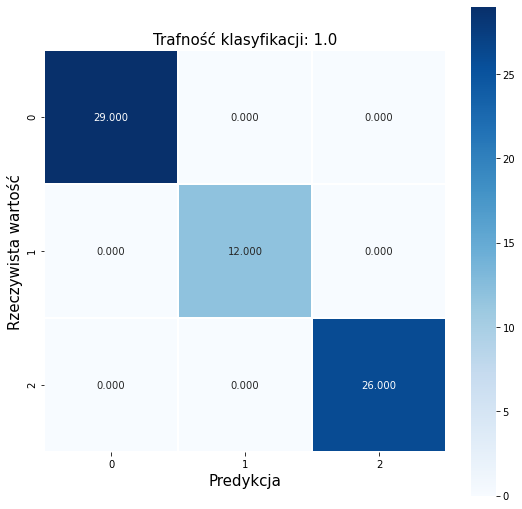

In [53]:
svm_cm = metrics.confusion_matrix(y_test, svm_pred)
print(svm_cm)
conf_matrix(cm=svm_cm, score=svm_score)